In [1]:
import pandas as pd
df=pd.read_csv('./etl_firesize.zip')
df

,Unnamed: 0,SOURCE_SYSTEM_TYPE,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,CONT_DATE,DISCOVERY_DATE,CONT_DOY,DISCOVERY_TIME,...,OWNER_DESCR,STATE,datetime,population_density,ELEVATION,AWND,PRCP,TMAX,TMIN,distance
0,0,FED,2011,47,Debris Burning,5.0,2455608.5,2455608.5,47.0,1300.0,...,USFS,AL,2011-02-16,7.572142,100.6,8.062714,0.0,71.000000,32.000000,0.141421
1,1,FED,2011,47,Debris Burning,5.0,2455610.5,2455608.5,49.0,820.0,...,STATE OR PRIVATE,AL,2011-02-16,31.442815,201.5,8.048481,0.0,76.942800,49.340830,0.100000
2,2,FED,2011,48,Arson,7.0,2455609.5,2455609.5,48.0,2030.0,...,USFS,AL,2011-02-17,7.572142,100.6,8.064342,0.0,70.000000,33.000000,0.200000
3,3,FED,2011,50,Arson,7.0,2455617.5,2455611.5,56.0,1800.0,...,STATE OR PRIVATE,AL,2011-02-19,49.942890,182.9,8.037152,0.0,66.000000,49.000000,0.282843
4,4,FED,2011,51,Debris Burning,5.0,2455625.5,2455612.5,64.0,1500.0,...,USFS,AL,2011-02-20,49.942890,189.0,8.042611,0.0,76.657125,49.084371,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367739,367739,NONFED,2015,75,Miscellaneous,9.0,NaN,2457097.5,NaN,NaN,...,MISSING/NOT SPECIFIED,VA,2015-03-16,33.568885,283.5,7.366097,0.0,61.000000,39.000000,0.100000
367740,367740,NONFED,2015,95,Miscellaneous,9.0,NaN,2457117.5,NaN,NaN,...,MISSING/NOT SPECIFIED,VA,2015-04-05,33.568885,283.5,7.358285,0.0,57.000000,39.000000,0.100000
367741,367741,NONFED,2015,37,Miscellaneous,9.0,NaN,2457059.5,NaN,NaN,...,MISSING/NOT SPECIFIED,VA,2015-02-06,38.354455,247.8,7.406834,0.0,70.218508,43.916184,0.100000
367742,367742,NONFED,2015,89,Miscellaneous,9.0,NaN,2457111.5,NaN,NaN,...,MISSING/NOT SPECIFIED,VA,2015-03-30,38.354455,208.2,7.384267,0.0,69.862021,43.603630,0.141421


In [2]:
df=df.iloc[:,1:]
# list the column name
df.columns
# SOURCE_SYSTEM_TYPE = Type of source database or system that the record was drawn from (federal, nonfederal, or interagency).
# FIRE_YEAR: calendar year in which the fire was discovered or confirmed to exist
# DISCOVERY_DOY: Day of year on which the fire was discovered or confirmed to exist
# DISCOVERY_DATE: date on which the fire was discovered or confirmed to exist
# DISCOVERY_TIME: time of day that the fire was discovered or confirmed to exist
# CONT_DATE: date on which the fire was declared contained or otherwise controlled 
# CONT_DOY: Day of year on which the fire was declared contained or otherwise controlled
# CONT_TIME: time of day that the fire was declared contained or otherwise controlled
# FIRE_SIZE: the estimate of acres within the final perimeter of the fire
# FIRE_SIZE_CLASS: Code for fire size based on the number of acres within the final fire perimeter
# (A: >0 <=0.25acres, B: 0.26-9.9 acres, C: 10-99.9 acres, D: 100-299 acres, E: 300-999 acres, F:1000-4999 acres, G: 5000+)
# OWNER_DESCR: Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.


Index(['SOURCE_SYSTEM_TYPE', 'FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_DESCR',
       'STAT_CAUSE_CODE', 'CONT_DATE', 'DISCOVERY_DATE', 'CONT_DOY',
       'DISCOVERY_TIME', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE_x', 'LONGITUDE_x', 'OWNER_CODE', 'OWNER_DESCR', 'STATE',
       'datetime', 'population_density', 'ELEVATION', 'AWND', 'PRCP', 'TMAX',
       'TMIN', 'distance'],
      dtype='object')

In [3]:
# delete the duplicate rows
# shape of data
df.shape
df = df.drop_duplicates()
df.shape

(367417, 25)

In [4]:
# check the missing values
print(df.columns[list(df.isnull().any())])
# df.describe()

# filter the columns contain missing values and 
df_filter=df.copy()

Index(['CONT_DATE', 'CONT_DOY', 'DISCOVERY_TIME', 'CONT_TIME'], dtype='object')


In [5]:

df_filter["DOY_diff"]=df_filter["CONT_DOY"]-df_filter["DISCOVERY_DOY"]
df_filter["TIME_diff"]=df_filter["CONT_TIME"]-df_filter["DISCOVERY_TIME"]


df_filter["hour_diff"]=df_filter["DOY_diff"]*24+(df_filter["TIME_diff"]/100)
# fill in the na rows using the average duration of the fire
sum(df_filter["hour_diff"].isna())

df_filter["hour_diff"]=df_filter["hour_diff"].fillna(df_filter["hour_diff"].mean())
df_filter.columns

df_filter["month"]=pd.to_datetime(df_filter["datetime"]).dt.month
# df['mm'] = pd.to_datetime(df['StartDate']).dt.month

In [6]:
df_filter["DISCOVERY_TIME"]=df_filter["DISCOVERY_TIME"].fillna(0000)

In [7]:
# remove the features as they do not make sense for output or correlated to others
df_filter=df_filter.drop(['DISCOVERY_DATE','CONT_DOY','CONT_TIME','CONT_DATE','DOY_diff','TIME_diff','OWNER_DESCR'],axis=1)
print(list(df_filter.isnull().any()))


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [8]:
df_filter["FIRE_SIZE_CLASS"].value_counts()
# len(df_filter["FIRE_SIZE_CLASS"])

B    172903
A    143165
C     40062
D      5639
E      2849
F      1754
G      1045
Name: FIRE_SIZE_CLASS, dtype: int64

Matplotlib is building the font cache; this may take a moment.


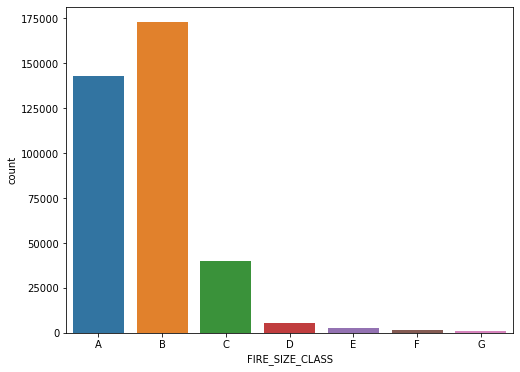

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6),facecolor='w')
sns.countplot(x='FIRE_SIZE_CLASS',data=df_filter,order=['A','B','C','D','E','F','G'])
plt.show()




As seen in the graph, dataset is highly imbalanced with maximum reported incidents lying in CLASS B.

Analyzing categorical features 
1: SOURCE_SYSTEM_TYPE

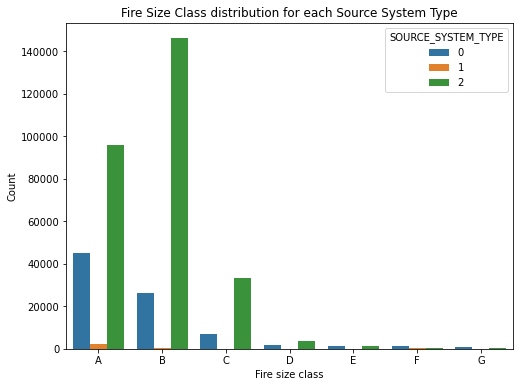

In [10]:
len(df_filter.SOURCE_SYSTEM_TYPE.unique())
# label encoder this 3 unique values
from sklearn.preprocessing import LabelEncoder
df_filter["SOURCE_SYSTEM_TYPE"]=LabelEncoder().fit_transform(df["SOURCE_SYSTEM_TYPE"])
df_filter["SOURCE_SYSTEM_TYPE"].astype("int64")

# histogram show the relationship between SOURCE_SYSTEM_TYPE and FIRE_SIZE_CLASS
plt.figure(figsize=(8,6),facecolor='w')
sns.countplot(x="FIRE_SIZE_CLASS",hue="SOURCE_SYSTEM_TYPE",data=df_filter,order=['A','B','C','D','E','F','G'])
plt.xlabel("Fire size class")
plt.ylabel("Count")
plt.title("Fire Size Class distribution for each Source System Type")
plt.show()


As the plot shown, the distribution of the fire size class are associated with the distribution of type 2 (INTERAGCY) source system type. 
Therefore, this feature should be keep and would be useful for our model.

# check the SOURCE_SYSTEM, NWCG_REPORTING_AGENCY if still have time

Analyzing 
2: FIRE_YEAR

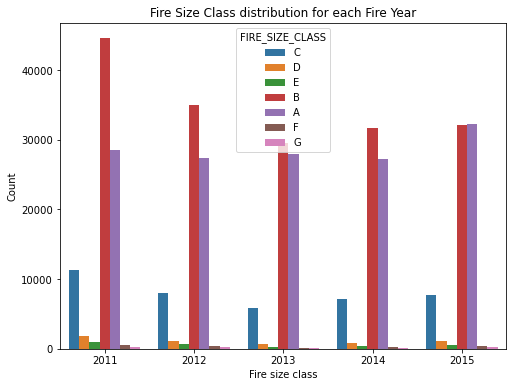

In [11]:
plt.figure(figsize=(8,6),facecolor='w')
sns.countplot(hue ='FIRE_SIZE_CLASS', x = "FIRE_YEAR", data = df_filter) 
plt.xlabel('Fire size class')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each Fire Year')
plt.show()

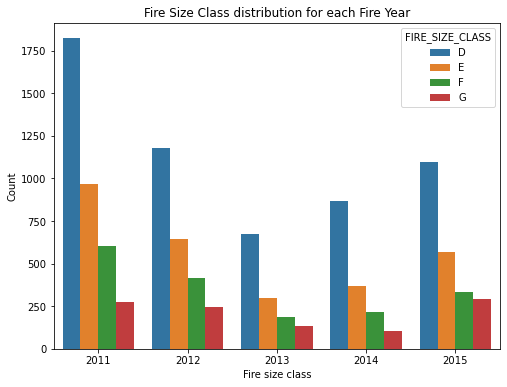

In [12]:
# 2011 has the most B,C size fires reported and 2015 has the most A size reported
# now lets check the others 
df_filter2=df_filter.copy()
df_large=(df_filter2["FIRE_SIZE_CLASS"]!='A')&(df_filter2["FIRE_SIZE_CLASS"]!='B')&(df_filter2["FIRE_SIZE_CLASS"]!='C')
large_sets=df_filter2[df_large]
plt.figure(figsize=(8,6),facecolor='w')
sns.countplot(hue ='FIRE_SIZE_CLASS', x = "FIRE_YEAR", data = large_sets) 
plt.xlabel('Fire size class')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each Fire Year')
plt.show()

the largest fires happened mostly in 2011 and 2015. class D,E,F mostly recorded in 2011. 

Add a new feature month from datetime


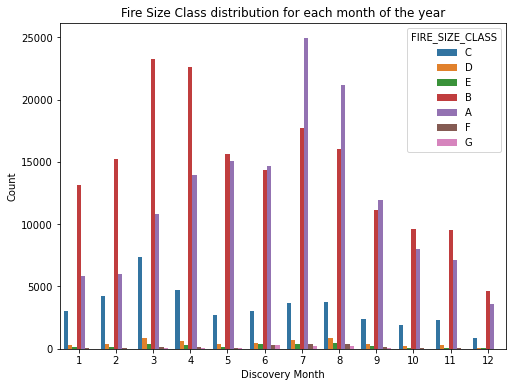

In [13]:
#Graphical analysis of discovery month feature
plt.figure(figsize=(8,6),facecolor='w')
sns.countplot(x ='month', hue = "FIRE_SIZE_CLASS", data = df_filter) 
plt.xlabel('Discovery Month')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each month of the year')
plt.show()

1-4 month, the class B fire mostly occured. 9-12 month, all classes fire reduced.
6-8 month, the class G occured more than other months. 

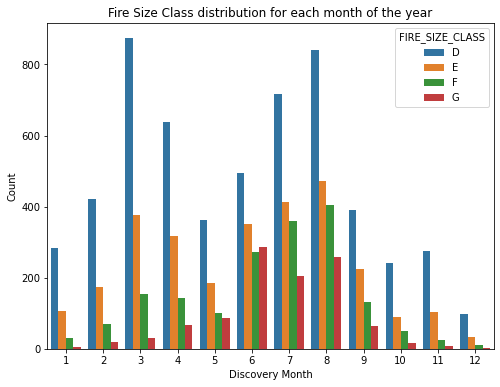

In [14]:
plt.figure(figsize=(8,6),facecolor='w')
sns.countplot(x ='month', hue = "FIRE_SIZE_CLASS", data = large_sets) 
plt.xlabel('Discovery Month')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each month of the year')
plt.show()

6-8 are the peek stage of the large fire. 
3,4 month size D fire happened a lot. 

Anlyzing 3:DISCOVERY_TIME

*   null --> 0
*   early morning: 5am - 12pm --> 1
*   afternoon: 12pm-5pm --> 2
*   evening: 5pm-10pm --> 3
*   night: 10pm-5am --> 4




In [15]:

def convert_time(df):
    
    if (df['DISCOVERY_TIME'] ==0):
      return 0
    elif (500<df['DISCOVERY_TIME'] <=1200):
        return 1
    elif (1200<df['DISCOVERY_TIME'] <=1700):
        return 2
    elif (1700<df['DISCOVERY_TIME'] <=2200):
        return 3
    else:
        return 4
    
df_filter2['time'] = df_filter2.apply(convert_time, axis = 1)
df_filter2['time'].astype('int64')

0         2
1         1
2         3
3         3
4         2
         ..
367739    0
367740    0
367741    0
367742    0
367743    0
Name: time, Length: 367417, dtype: int64

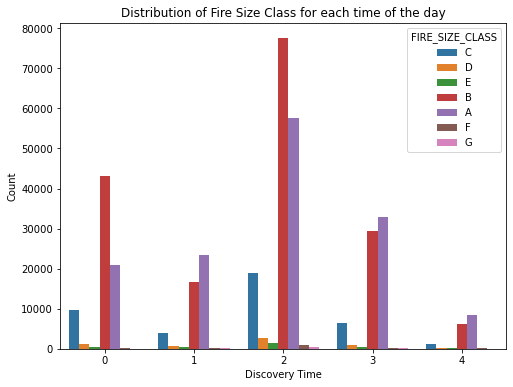

In [16]:

plt.figure(figsize=(8,6),facecolor='w')
sns.countplot(x ='time', hue = "FIRE_SIZE_CLASS", data = df_filter2) 
plt.xlabel('Discovery Time')
plt.ylabel('Count')
plt.title('Distribution of Fire Size Class for each time of the day')
plt.show()

latitude and longitude

In [17]:
import numpy as np

# round off the values and apply flooring group the nearly forest fires 
df_filter2['LATITUDE'] = (df_filter2['LATITUDE_x']*10).apply(np.floor)/10
df_filter2['LONGITUDE'] = (df_filter2['LONGITUDE_x']*10).apply(np.floor)/10

geom_grp = df_filter2.groupby(['LATITUDE', 'LONGITUDE'])
wildfires = geom_grp['FIRE_SIZE_CLASS'].agg(['count']).reset_index()
wildfires

,LATITUDE,LONGITUDE,count
0,19.0,-155.8,3
1,19.1,-155.8,2
2,19.1,-155.5,1
3,19.2,-155.7,1
4,19.2,-155.5,3
...,...,...,...
49521,69.2,-155.3,1
49522,69.4,-154.2,1
49523,70.1,-151.2,1
49524,70.1,-150.7,1


In [18]:
# ! pip install colorcet
from bokeh.models import ColumnDataSource, LogColorMapper, ColorBar, LogTicker
from bokeh.plotting import figure, show
import colorcet as cc
from bokeh.io import output_notebook

source = ColumnDataSource(wildfires)
geo = figure(title="Geographical representation of wildfires in the U.S.(2011-2015)",
           toolbar_location=None, plot_width=600, plot_height=400)
geo.background_fill_color = "black"
geo.grid.grid_line_color = None
geo.axis.visible = False
#Using fire palette already available in cc
color_mapper = LogColorMapper(palette=cc.fire, low=1, high=4232)
glyph = geo.circle('LONGITUDE', 'LATITUDE', source=source,
          color={'field': 'count', 'transform' : color_mapper},
          size=1)
#Legend: color_bar
color_bar = ColorBar(color_mapper=color_mapper,  label_standoff=12, border_line_color=None, ticker=LogTicker(), location=(0,0))
output_notebook()
geo.add_layout(color_bar, 'right')
show(geo)

Loading BokehJS ...

Lighter color means more wildfires 

In [19]:
df_filter2["STATE"]=LabelEncoder().fit_transform(df_filter2["STATE"])
df_filter2["STATE"].astype("int64")

df_filter2["temp_average"]=(df_filter2["TMAX"]+df_filter2["TMIN"])/2

df_filter2["FIRE_SIZE_CLASS"] =LabelEncoder().fit_transform(df_filter2["FIRE_SIZE_CLASS"])
# df_filter2

In [20]:
df_filter2=df_filter2.drop(columns=['DISCOVERY_DOY','DISCOVERY_TIME','datetime','STAT_CAUSE_DESCR','LATITUDE_x','LONGITUDE_x','FIRE_SIZE','TMAX','TMIN'])

Feature engineer

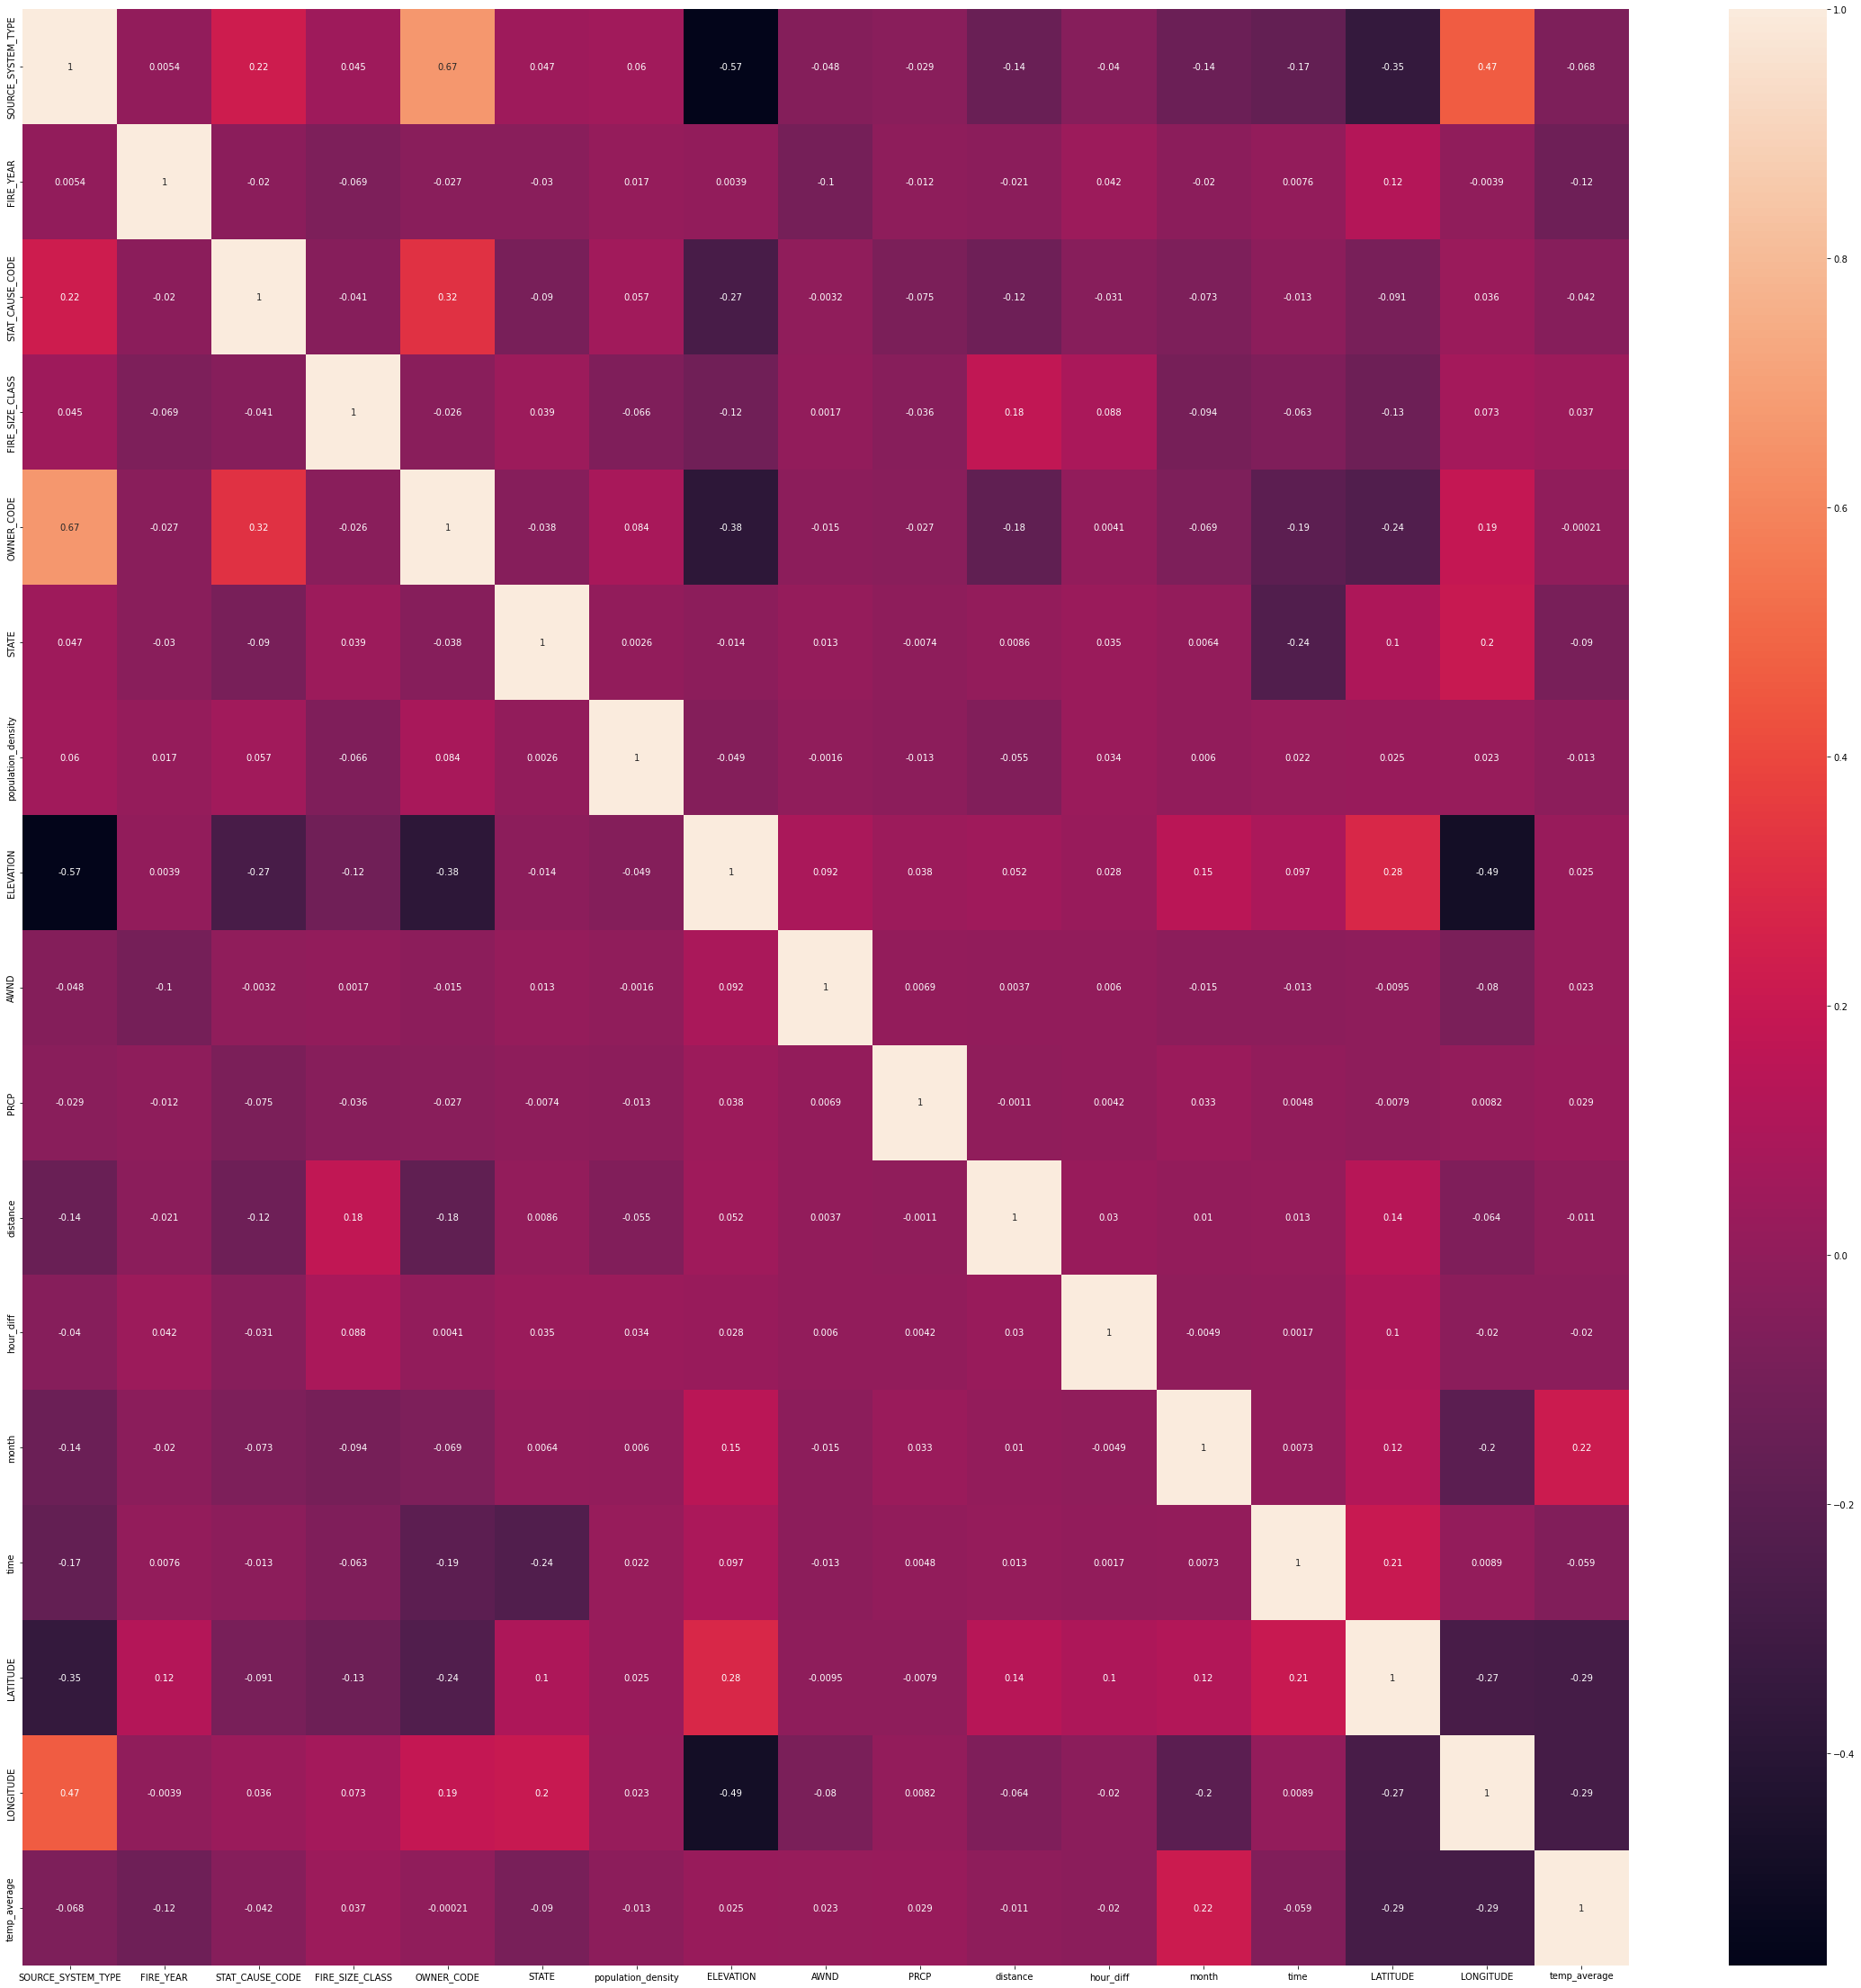

In [21]:
plt.figure(figsize=(40,40))
# df_filter.columns
corr=df_filter2.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [22]:
df_final = df_filter2.copy()
df_final.shape

(367417, 17)

The final selected features are not much correlated to each other. ready for the model

## Multi-class performance 
accuracy is not a great measure of classifier performance when the classes are imbalanced
For a high class imbalance, always choose the F1 score because a high F1 score considers both precision and recall.

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# separate features and target
feature=df_final.drop(['FIRE_SIZE_CLASS'],axis=1)
# feature = df_filter.drop("FIRE_SIZE_CLASS",1)
y=df_final["FIRE_SIZE_CLASS"]

# split data intp test and train datasets
feature_train, feature_test, y_train, y_test = train_test_split(feature, y, test_size=0.3,stratify=y)


In [ ]:
# feature reduction
# Standardizing the features

# since the longitude and lantitude are geospatial features, do not normalize 
# x = StandardScaler().fit_transform(feature)

/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train accuracy for KNN is:  0.7214754793130397
test accuracy for KNN is:  0.6133852267160198
              precision    recall  f1-score   support

           0       0.64      0.70      0.67     42950
           1       0.62      0.68      0.65     51871
           2       0.37      0.17      0.23     12019
           3       0.14      0.03      0.04      1692
           4       0.16      0.03      0.05       855
           5       0.16      0.05      0.08       526
           6       0.28      0.12      0.17       313

    accuracy                           0.61    110226
   macro avg       0.34      0.25      0.27    110226
weighted avg       0.59      0.61      0.59    110226



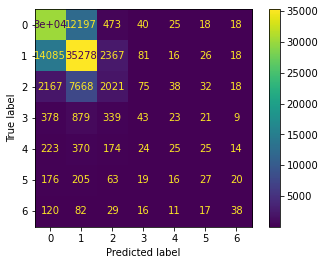

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
knnmodel= KNeighborsClassifier(n_neighbors=5).fit(feature_train,y_train)

knn_predict = knnmodel.predict(feature_test)

train_accuracy = knnmodel.score(feature_train,y_train)
test_accuracy = knnmodel.score(feature_test,y_test)

from  sklearn.metrics import mean_absolute_error, confusion_matrix, log_loss, plot_confusion_matrix,classification_report
# knn_MAE = mean_absolute_error(y_test, knn_predict)
plot_confusion_matrix(knnmodel,feature_test,y_test)


print("train accuracy for KNN is: ", train_accuracy)
print("test accuracy for KNN is: ", test_accuracy)
# print("KNN mean absolute error is: ", knn_MAE)
print(classification_report(y_test,knn_predict))



the Logistic Regression yielded a 0.03-0.05 recall for large fire, it didn’t successfully classify any fires into those groups, which needs to be improved.
the precision is high means that the model is careful to avoid wrong labelings
the recall is low mean that the classifier is too careful to loss some correct items.
F1 can reflect the trade-off (imbalance b/w precisiona and recall) 

/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-package

train accuracy for multi_class logistical model is:  0.5681264118884409
test accuracy for multi_class logistical model is:  0.5686680093625823
              precision    recall  f1-score   support

           0       0.61      0.48      0.54     42950
           1       0.55      0.81      0.66     51871
           2       0.00      0.00      0.00     12019
           3       0.00      0.00      0.00      1692
           4       0.00      0.00      0.00       855
           5       0.02      0.00      0.00       526
           6       0.00      0.00      0.00       313

    accuracy                           0.57    110226
   macro avg       0.17      0.18      0.17    110226
weighted avg       0.50      0.57      0.52    110226



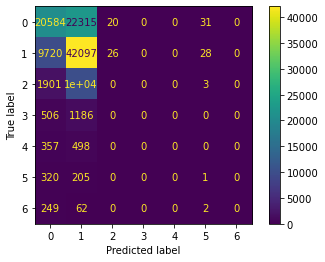

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression(multi_class='multinomial',solver='lbfgs',penalty='l2', C=1.0)

log_model=logistic_model.fit(feature_train,y_train)
log_predict=log_model.predict(feature_test)

train_accuracy = log_model.score(feature_train,y_train)
test_accuracy = log_model.score(feature_test,y_test)

plot_confusion_matrix(log_model,feature_test,y_test)


print("train accuracy for multi_class logistical model is: ", train_accuracy)
print("test accuracy for multi_class logistical model is: ", test_accuracy)

print(classification_report(y_test,log_predict))

/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train accuracy for random forest model is:  0.765112309528716
test accuracy for random forest model is:  0.6803385771052202
              precision    recall  f1-score   support

           0       0.73      0.74      0.73     42950
           1       0.65      0.79      0.72     51871
           2       0.55      0.18      0.27     12019
           3       0.21      0.01      0.01      1692
           4       0.31      0.02      0.04       855
           5       0.33      0.07      0.12       526
           6       0.47      0.22      0.30       313

    accuracy                           0.68    110226
   macro avg       0.47      0.29      0.31    110226
weighted avg       0.66      0.68      0.65    110226



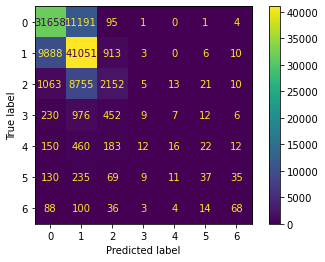

In [32]:
rf_model= RandomForestClassifier(max_depth=15).fit(feature_train,y_train)
rf_predict = rf_model.predict(feature_test)

train_accuracy = rf_model.score(feature_train,y_train)
test_accuracy = rf_model.score(feature_test,y_test)

plot_confusion_matrix(rf_model,feature_test,y_test)


print("train accuracy for random forest model is: ", train_accuracy)
print("test accuracy for random forest model is: ", test_accuracy)

print(classification_report(y_test,rf_predict))

apply SMOTE to improve the performace for small count fire size class

In [33]:


from collections import Counter

# separate features and target
y_smote=y_train

feature_smote=feature_train

counter=Counter(y_smote)
for k,v in counter.items():
    per =v/len(y_smote)*100
    print('Class: %d, n=%d (%.3f%%)' % (k,v,per))
# feature = df_filter.drop("FIRE_SIZE_CLASS",1)
# y=df_final["FIRE_SIZE_CLASS"]

# split data intp test and train datasets
# feature_train, feature_test, y_train, y_test = train_test_split(feature, y, test_size=0.3,stratify=y)



Class: 1, n=121032 (47.059%)
Class: 0, n=100215 (38.965%)
Class: 3, n=3947 (1.535%)
Class: 2, n=28043 (10.904%)
Class: 4, n=1994 (0.775%)
Class: 5, n=1228 (0.477%)
Class: 6, n=732 (0.285%)


apply SMOTE to oversample the dataset


In [34]:
# ! pip install imblearn
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
feature_smote, y_smote = oversample.fit_resample(feature_smote,y_smote)

counter=Counter(y_smote)
for k,v in counter.items():
    per =v/len(y_smote)*100
    print('Class: %d, n=%d (%.3f%%)' % (k,v,per))

Class: 1, n=121032 (14.286%)
Class: 0, n=121032 (14.286%)
Class: 3, n=121032 (14.286%)
Class: 2, n=121032 (14.286%)
Class: 4, n=121032 (14.286%)
Class: 5, n=121032 (14.286%)
Class: 6, n=121032 (14.286%)


/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train accuracy for random forest model (balanced) is:  0.8161466152989056
test accuracy for random forest model (balanced) is:  0.6244715402899498
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     42950
           1       0.71      0.59      0.65     51871
           2       0.36      0.44      0.40     12019
           3       0.11      0.21      0.14      1692
           4       0.08      0.20      0.11       855
           5       0.09      0.30      0.14       526
           6       0.17      0.54      0.26       313

    accuracy                           0.62    110226
   macro avg       0.32      0.43      0.35    110226
weighted avg       0.66      0.62      0.64    110226



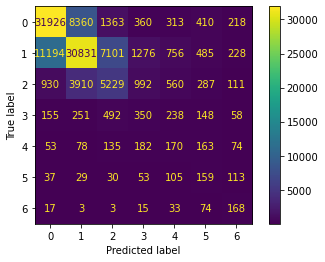

In [40]:
rf_model= RandomForestClassifier(max_depth=15).fit(feature_smote,y_smote)
rf_predict = rf_model.predict(feature_test)

train_accuracy = rf_model.score(feature_smote,y_smote)
test_accuracy = rf_model.score(feature_test,y_test)

plot_confusion_matrix(rf_model,feature_test,y_test)


print("train accuracy for random forest model (balanced) is: ", train_accuracy)
print("test accuracy for random forest model (balanced) is: ", test_accuracy)

print(classification_report(y_test,rf_predict))

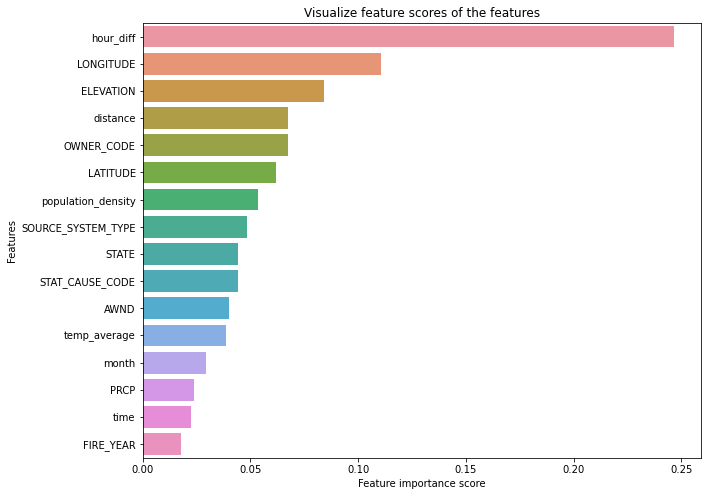

In [42]:
feature_scores=pd.Series(rf_model.feature_importances_,index=feature_train.columns).sort_values(ascending=False)
feature_scores

plt.figure(figsize=(10, 8),facecolor='w')
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.title("Visualize feature scores of the features")
# plt.yticks(feature_scores.index)
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.show()

In [53]:
# deal with the overfitting
feature_ofit_train=feature_smote.copy()
y_ofit_train=y_smote.copy()
feature_ofit_test=feature_test.copy()
y_ofit_test=y_test.copy()

# delete last 3 
delete_columns=["FIRE_YEAR","time","PRCP","month"]
feature_ofit_train=feature_ofit_train.drop(columns=delete_columns,axis=1)
feature_ofit_test=feature_ofit_test.drop(columns=delete_columns,axis=1)



In [46]:
# # test for the overfit no smote
# # deal with the overfitting
# feature_ofit_train=feature_train.copy()
# y_ofit_train=y_train.copy()
# feature_ofit_test=feature_test.copy()
# y_ofit_test=y_test.copy()

# # delete last 3 
# delete_columns=["FIRE_YEAR","time","SOURCE_SYSTEM_TYPE","PRCP","month"]
# feature_ofit_train=feature_ofit_train.drop(columns=delete_columns,axis=1)
# feature_ofit_test=feature_ofit_test.drop(columns=delete_columns,axis=1)



In [59]:
y_train

265779    2
177351    0
242972    0
2939      2
16389     1
         ..
320825    0
19483     1
9344      0
352177    0
4614      2
Name: FIRE_SIZE_CLASS, Length: 257191, dtype: int64

/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train accuracy for random forest model (balanced+feature selection) is:  0.7554541177568422
test accuracy for random forest model (balanced+feature selection) is:  0.6743145900241322
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     42950
           1       0.65      0.78      0.71     51871
           2       0.54      0.18      0.27     12019
           3       0.11      0.00      0.00      1692
           4       0.30      0.01      0.02       855
           5       0.28      0.05      0.09       526
           6       0.49      0.25      0.33       313

    accuracy                           0.67    110226
   macro avg       0.44      0.29      0.31    110226
weighted avg       0.65      0.67      0.65    110226



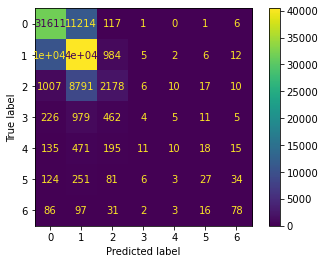

In [48]:
rf_model_improve= RandomForestClassifier(max_depth=15).fit(feature_ofit_train,y_ofit_train)
rf_predict = rf_model_improve.predict(feature_ofit_test)

train_accuracy = rf_model_improve.score(feature_ofit_train,y_ofit_train)
test_accuracy = rf_model_improve.score(feature_ofit_test,y_ofit_test)

plot_confusion_matrix(rf_model_improve,feature_ofit_test,y_ofit_test)


print("train accuracy for random forest model (balanced+feature selection) is: ", train_accuracy)
print("test accuracy for random forest model (balanced+feature selection) is: ", test_accuracy)

print(classification_report(y_ofit_test,rf_predict))

/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train accuracy for KNN (feature selection and smote) is:  0.8961644146058185
test accuracy for KNN (feature selection and smote) is:  0.5446627837352349
              precision    recall  f1-score   support

           0       0.66      0.68      0.67     42950
           1       0.65      0.49      0.56     51871
           2       0.26      0.39      0.31     12019
           3       0.07      0.17      0.10      1692
           4       0.06      0.16      0.09       855
           5       0.08      0.22      0.12       526
           6       0.10      0.32      0.16       313

    accuracy                           0.54    110226
   macro avg       0.27      0.35      0.29    110226
weighted avg       0.59      0.54      0.56    110226



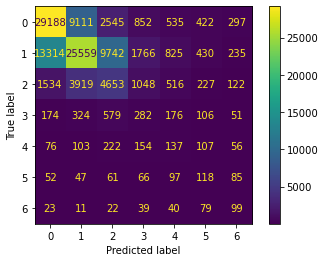

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
knnmodel= KNeighborsClassifier(n_neighbors=5).fit(feature_ofit_train,y_ofit_train)

knn_predict = knnmodel.predict(feature_ofit_test)

train_accuracy = knnmodel.score(feature_ofit_train,y_ofit_train)
test_accuracy = knnmodel.score(feature_ofit_test,y_test)

# from  sklearn.metrics import mean_absolute_error, confusion_matrix, log_loss, plot_confusion_matrix,classification_report
# knn_MAE = mean_absolute_error(y_test, knn_predict)
plot_confusion_matrix(knnmodel,feature_ofit_test,y_test)


print("train accuracy for KNN (feature selection and smote) is: ", train_accuracy)
print("test accuracy for KNN (feature selection and smote) is: ", test_accuracy)
# print("KNN mean absolute error is: ", knn_MAE)
print(classification_report(y_test,knn_predict))



/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train accuracy for multi_class logistical model (feature selection and smote)is:  0.2728699847974089
test accuracy for multi_class logistical model (feature selection and smote)is:  0.40297207555386205
              precision    recall  f1-score   support

           0       0.56      0.39      0.46     42950
           1       0.55      0.46      0.50     51871
           2       0.15      0.29      0.20     12019
           3       0.04      0.03      0.04      1692
           4       0.02      0.14      0.04       855
           5       0.02      0.17      0.04       526
           6       0.04      0.50      0.07       313

    accuracy                           0.40    110226
   macro avg       0.20      0.28      0.19    110226
weighted avg       0.49      0.40      0.44    110226



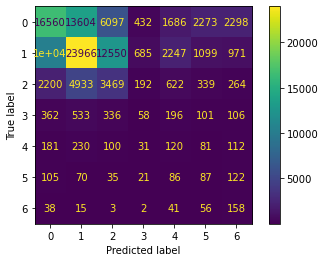

In [55]:
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression(multi_class='multinomial',solver='lbfgs',penalty='l2', C=1.0)

log_model=logistic_model.fit(feature_ofit_train,y_ofit_train)
log_predict=log_model.predict(feature_ofit_test)

train_accuracy = log_model.score(feature_ofit_train,y_ofit_train)
test_accuracy = log_model.score(feature_ofit_test,y_test)

plot_confusion_matrix(log_model,feature_ofit_test,y_test)


print("train accuracy for multi_class logistical model (feature selection and smote)is: ", train_accuracy)
print("test accuracy for multi_class logistical model (feature selection and smote)is: ", test_accuracy)

print(classification_report(y_test,log_predict))

/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train accuracy for neural network is:  0.653129386331559
test accuracy for neural network is:  0.6480140801625751
              precision    recall  f1-score   support

           0       0.67      0.75      0.71     42950
           1       0.65      0.70      0.67     51871
           2       0.50      0.22      0.31     12019
           3       0.18      0.01      0.01      1692
           4       0.18      0.01      0.02       855
           5       0.26      0.06      0.10       526
           6       0.31      0.24      0.27       313

    accuracy                           0.65    110226
   macro avg       0.39      0.28      0.30    110226
weighted avg       0.63      0.65      0.63    110226



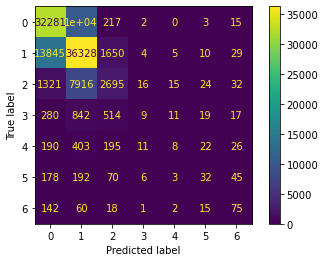

In [56]:
from sklearn.neural_network import MLPClassifier
dnn_model=MLPClassifier(hidden_layer_sizes=[100]*5)
dnn_model.fit(feature_train, y_train)
dnn_predict=dnn_model.predict(feature_test)
train_accuracy = dnn_model.score(feature_train,y_train)
test_accuracy = dnn_model.score(feature_test,y_test)

plot_confusion_matrix(dnn_model,feature_test,y_test)


print("train accuracy for neural network is: ", train_accuracy)
print("test accuracy for neural network is: ", test_accuracy)

print(classification_report(y_test,dnn_predict))

/usr/shared/CMPT/big-data/condaenv/gt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train accuracy for neural network (featuer selection and smote) is:  0.7264383445228181
test accuracy for neural network (feature selection and smote) is:  0.5000544336182026
              precision    recall  f1-score   support

           0       0.69      0.64      0.66     42950
           1       0.65      0.40      0.50     51871
           2       0.25      0.49      0.33     12019
           3       0.06      0.27      0.10      1692
           4       0.04      0.21      0.07       855
           5       0.06      0.27      0.10       526
           6       0.10      0.40      0.17       313

    accuracy                           0.50    110226
   macro avg       0.27      0.38      0.28    110226
weighted avg       0.60      0.50      0.53    110226



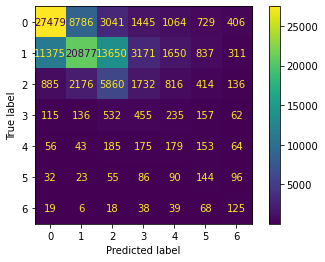

In [57]:
from sklearn.neural_network import MLPClassifier
dnn_model=MLPClassifier(hidden_layer_sizes=[100]*5)
dnn_model.fit(feature_ofit_train, y_ofit_train)
dnn_predict=dnn_model.predict(feature_ofit_test)
train_accuracy = dnn_model.score(feature_ofit_train,y_ofit_train)
test_accuracy = dnn_model.score(feature_ofit_test,y_test)

plot_confusion_matrix(dnn_model,feature_ofit_test,y_test)


print("train accuracy for neural network (featuer selection and smote) is: ", train_accuracy)
print("test accuracy for neural network (feature selection and smote) is: ", test_accuracy)

print(classification_report(y_test,dnn_predict))

In [ ]:
# from sklearn import model_selection
# import numpy as np


# # 10-Fold Cross validation
# from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# scoring = { 'precision' : make_scorer(precision_score),
#            'recall' : make_scorer(recall_score), 
#            'f1_score' : make_scorer(f1_score)}

# kfold = model_selection.KFold(n_splits=10, random_state=42)
# # model = RandomForestClassifier(n_estimators=50) 

# results = model_selection.cross_val_score(estimator=rf_model_improve,
#                                           X=feature_smote,
#                                           y=y_smote,
#                                           cv=kfold,
#                                           scoring=scoring)
# # print np.mean(cross_val_score(clf, X_train, y_train, cv=10))
# print (results)

In [ ]:
# from tensorflow.keras import backend as K

# def f1(y_true, y_pred):    
#     def recall_m(y_true, y_pred):
#         TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         Positives = K.sum(K.round(K.clip(y_true, 0, 1)))        
#         recall = TP / (Positives+K.epsilon())    
#         return recall 
    
    
#     def precision_m(y_true, y_pred):
#         TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
#         precision = TP / (Pred_Positives+K.epsilon())
#         return precision 
    
#     precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense,Dropout
# from keras.utils.np_utils import to_categorical
# # from keras.optimizers import 
# y_cat_train=to_categorical(y_smote)
# y_cat_test=to_categorical(y_test)

# model=Sequential()
# model.add(Dense(100, input_dim=16, activation='relu'))
# model.add(Dense(20,activation="relu"))
# # model.add(Dense(30,activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(7,activation="softmax"))
# model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# model.fit(feature_smote,y_cat_train,epochs=4,verbose=1)
# # y_pred_class=model.predict(feature_test)
# y_pred=model.predict(feature_test)
# y_pred_class=np.argmax(y_pred,axis=1)
# y_test_class=np.argmax(y_cat_test,axis=1)
# confusion_matrix(y_test_class,y_pred_class)
# classification_report(y_test_class,y_pred_class)
# # f_value=model.evaluate(feature_test,y_test)
# # f_value


In [ ]:
# print(classification_report(y_test_class,y_pred_class))

# # y_cat_train

In [59]:
# ! pip install prettytable
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable([" ", "Logistic Regression", "KNN", "MLP","Random Forest","MLP(smote +feature selection)","Random F(smote)"])
 
# Add rows
myTable.add_row(["train accuracy","0.5677","0.7214","0.6531","0.7651","0.7264","0.8161"])
myTable.add_row(["test accuracy","0.5674","0.6147","0.6480","0.6803","0.5000","0.6245" ])
myTable.add_row(["f1-A","0.56","0.67","0.71","0.73","0.66","0.73" ])
myTable.add_row(["f1-B","0.64","0.65","0.67","0.72","0.50","0.65" ])
myTable.add_row(["f1-C","0,00","0.23","0.31","0.27","0.33","0.40" ])
myTable.add_row(["f1-D","0,00","0.05","0.01","0.01","0.10","0.14" ])
myTable.add_row(["f1-E","0.00","0.06","0.02","0.04","0.07","0.11" ])
myTable.add_row(["f1-F","0.00","0.06","0.10","0.12","0.10","0.14" ])
myTable.add_row(["f1-G","0.00","0.12","0.27","0.30","0.17","0.26"])
# apply the smote method, the recall for large size of fire cases can improve from 10-30% which is important. 
 
print(myTable)

+----------------+---------------------+--------+--------+---------------+-------------------------------+-----------------+
|                | Logistic Regression |  KNN   |  MLP   | Random Forest | MLP(smote +feature selection) | Random F(smote) |
+----------------+---------------------+--------+--------+---------------+-------------------------------+-----------------+
| train accuracy |        0.5677       | 0.7214 | 0.6531 |     0.7651    |             0.7264            |      0.8161     |
| test accuracy  |        0.5674       | 0.6147 | 0.6480 |     0.6803    |             0.5000            |      0.6245     |
|      f1-A      |         0.56        |  0.67  |  0.71  |      0.73     |              0.66             |       0.73      |
|      f1-B      |         0.64        |  0.65  |  0.67  |      0.72     |              0.50             |       0.65      |
|      f1-C      |         0,00        |  0.23  |  0.31  |      0.27     |              0.33             |       0.40      |


You can see above that the Logistic Regression yielded a 0.00 recall for categories ‘C’ through ‘G’, basically saying that it didn’t successfully classify any fires into those groups, which isn’t good. The Random Forest Classifier on the right do much better for large size fire cases. and SMOTE method helps improve 10-30% for larger size fire cases classification